# Propensity Model  Capstone Project

## Building a Propensity Model for an Insurance Company

### Introduction
In the competitive landscape of insurance marketing, understanding customer behavior and predicting their actions is crucial. As a Data Scientist, My task is to develop a propensity model to forecast the likelihood that individuals will engage in specific actions, such as purchasing an insurance policy. This model will help the insurance company optimize its marketing efforts, ensuring resources are used effectively to target potential customers.

### Why Information About Customers is So Important

A lot of companies collect a ton of information about their customers, but if they don't use it right, then it's not really worth anything. The point is to take all this data and turn it into useful insights that can help the company grow. Propensity modeling is one way to do that.

### What is Propensity Modeling?

Propensity modeling is when you use statistics to figure out how likely it is for a customer to do something specific, like buy insurance or whatever. You take into account different factors that might affect their behavior, like their age, income, location, and stuff like that. This method helps companies identify which customers are most likely to be interested in a particular marketing campaign, so they can focus their efforts and money on those people.

## Data:

The insurance company has provided you with a historical data set (train.csv). The company has also provided you with a list of potential customers to whom to market (test.csv). From this list of potential customers, you need to determine yes/no whether you wish to market to them. (Note: Ignore any additional columns available other than the listed below in the table)

![Screenshot 2024-06-26 at 11.22.44 AM.png](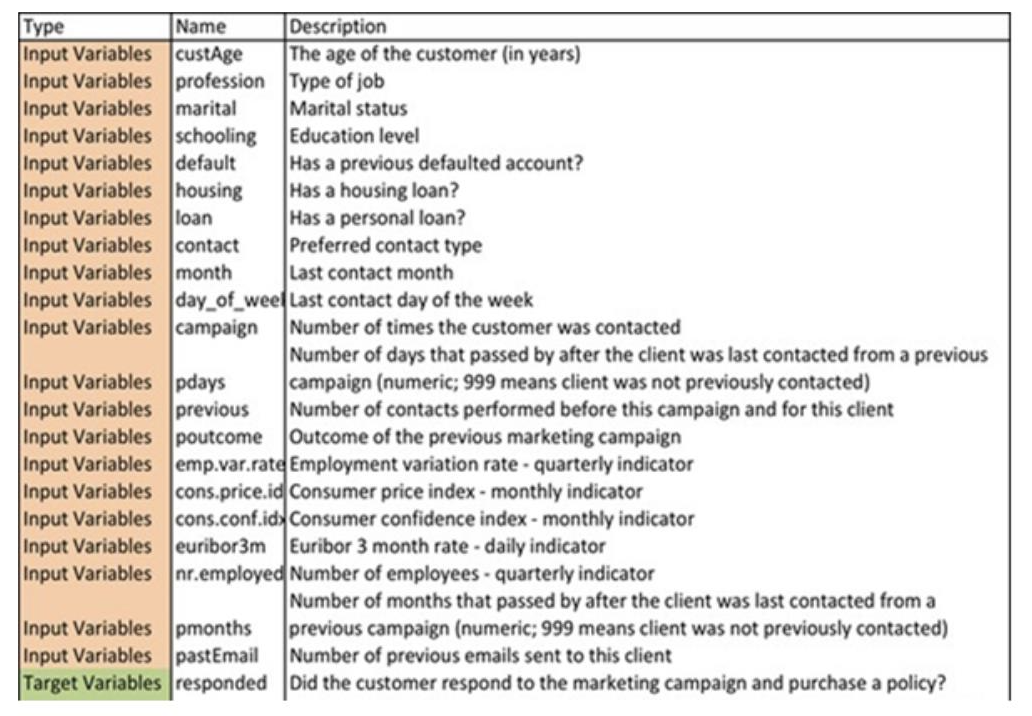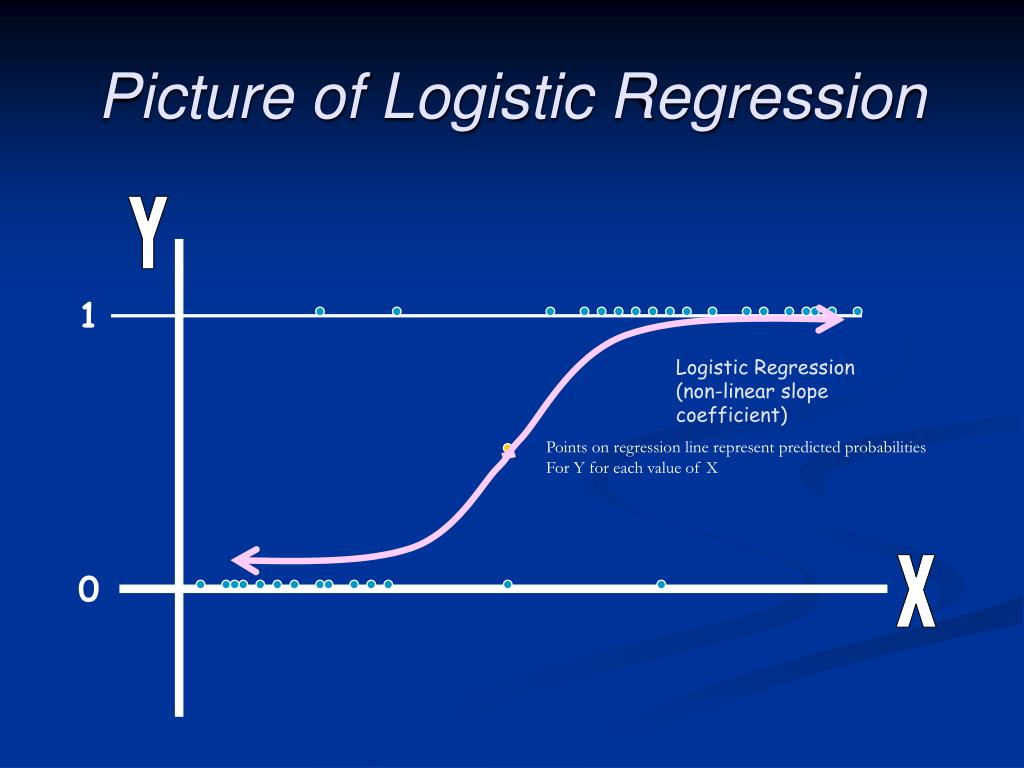)

### Import Libraries

In [ ]:
## Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import plotly.graph_objs as go
warnings.filterwarnings('ignore')

## Z-score for Outlier treatment
from scipy.stats import zscore

# Suppress warnings
warnings.filterwarnings('ignore')

## Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

## Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from plotly.subplots import make_subplots
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

## Model Evaluation Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

## Libraries for Hyperparameter Tuning and Cross Validation
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

pd.set_option('display.max_columns', None)




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read Dataset

In [ ]:
## Read Dataset
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dataset/Propensify/train.xlsx')

## Shape of dataset
data.shape

(8240, 24)

In [ ]:
## First 5 rows
data.head()

custAge   profession   marital          schooling  default housing loan  \
0     34.0       admin.    single  university.degree       no      no  yes   
1     31.0     services    single        high.school       no      no   no   
2      NaN       admin.    single        high.school       no      no   no   
3     52.0       admin.  divorced  university.degree  unknown     yes   no   
4     39.0  blue-collar    single                NaN  unknown     yes   no   

     contact month day_of_week  campaign  pdays  previous     poutcome  \
0   cellular   apr         wed       2.0  999.0       0.0  nonexistent   
1   cellular   jul         thu      35.0  999.0       0.0  nonexistent   
2  telephone   jun         NaN       1.0  999.0       0.0  nonexistent   
3   cellular   jul         tue       2.0  999.0       0.0  nonexistent   
4   cellular   jul         tue       6.0  999.0       0.0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0          -1.8          93.075          -47.1      1.498       5099.1   
1           1.4          93.918          -42.7      4.968       5228.1   
2           1.4          94.465          -41.8      4.961       5228.1   
3           1.4          93.918          -42.7      4.962       5228.1   
4           1.4          93.918          -42.7      4.961       5228.1   

   pmonths  pastEmail responded  profit   id  
0    999.0        0.0        no     NaN  1.0  
1    999.0        0.0        no     NaN  2.0  
2    999.0        0.0        no     NaN  3.0  
3    999.0        0.0        no     NaN  4.0  
4    999.0        0.0        no     NaN  5.0

In [ ]:
# Last 5 Rows
data.tail()

custAge     profession  marital          schooling  default housing  \
8235     32.0  self-employed   single  university.degree       no      no   
8236      NaN      housemaid  married  university.degree       no      no   
8237     85.0      housemaid  married                NaN  unknown     yes   
8238      NaN            NaN      NaN                NaN      NaN     NaN   
8239      NaN            NaN      NaN                NaN      NaN     NaN   

     loan   contact month day_of_week  campaign  pdays  previous     poutcome  \
8235   no  cellular   apr         thu       1.0  999.0       0.0  nonexistent   
8236   no  cellular   jun         tue       1.0  999.0       0.0  nonexistent   
8237   no  cellular   apr         tue       1.0  999.0       1.0      failure   
8238  NaN       NaN   NaN         NaN       NaN    NaN       NaN          NaN   
8239  NaN       NaN   NaN         NaN       NaN    NaN       NaN          NaN   

      emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
8235          -1.8          93.075          -47.1      1.435       5099.1   
8236          -2.9          92.963          -40.8      1.099       5076.2   
8237          -1.8          93.749          -34.6      0.642       5008.7   
8238           NaN             NaN            NaN        NaN          NaN   
8239           NaN             NaN            NaN        NaN          NaN   

      pmonths  pastEmail responded        profit      id  
8235    999.0        0.0       yes    208.000000  8236.0  
8236    999.0        0.0       yes    129.000000  8237.0  
8237    999.0        1.0       yes     33.000000  8238.0  
8238      NaN        NaN       NaN    172.112069     NaN  
8239      NaN        NaN       NaN -87622.112070     NaN

### Dropping Unwanted rows

In [ ]:
### Dropping last 2 Rows as the they are sum and average of profit column
data.drop(index=data.index[-2:], inplace=True)

In [ ]:
data.tail()

custAge     profession   marital          schooling  default housing  \
8233     55.0        retired   married        high.school       no     yes   
8234     41.0         admin.  divorced        high.school       no      no   
8235     32.0  self-employed    single  university.degree       no      no   
8236      NaN      housemaid   married  university.degree       no      no   
8237     85.0      housemaid   married                NaN  unknown     yes   

     loan    contact month day_of_week  campaign  pdays  previous  \
8233   no   cellular   oct         thu       2.0    7.0       1.0   
8234   no  telephone   jun         mon      11.0  999.0       0.0   
8235   no   cellular   apr         thu       1.0  999.0       0.0   
8236   no   cellular   jun         tue       1.0  999.0       0.0   
8237   no   cellular   apr         tue       1.0  999.0       1.0   

         poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
8233      success          -3.4          92.431          -26.9      0.722   
8234  nonexistent           1.4          94.465          -41.8      4.960   
8235  nonexistent          -1.8          93.075          -47.1      1.435   
8236  nonexistent          -2.9          92.963          -40.8      1.099   
8237      failure          -1.8          93.749          -34.6      0.642   

      nr.employed     pmonths  pastEmail responded  profit      id  
8233       5017.5    0.233333        0.0       yes   203.0  8234.0  
8234       5228.1  999.000000        0.0       yes   188.0  8235.0  
8235       5099.1  999.000000        0.0       yes   208.0  8236.0  
8236       5076.2  999.000000        0.0       yes   129.0  8237.0  
8237       5008.7  999.000000        1.0       yes    33.0  8238.0

### Dropping Unwanted Columns

In [ ]:
data.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail',
       'responded', 'profit', 'id'],
      dtype='object')

In [ ]:
# Dropping ID column and Profit column as they are not necessary
data.drop(['id','profit'], axis=1, inplace=True)

## Exploratory Data Analysis

In [ ]:
# Count and Dtype of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         6224 non-null   float64
 1   profession      8238 non-null   object 
 2   marital         8238 non-null   object 
 3   schooling       5832 non-null   object 
 4   default         8238 non-null   object 
 5   housing         8238 non-null   object 
 6   loan            8238 non-null   object 
 7   contact         8238 non-null   object 
 8   month           8238 non-null   object 
 9   day_of_week     7451 non-null   object 
 10  campaign        8238 non-null   float64
 11  pdays           8238 non-null   float64
 12  previous        8238 non-null   float64
 13  poutcome        8238 non-null   object 
 14  emp.var.rate    8238 non-null   float64
 15  cons.price.idx  8238 non-null   float64
 16  cons.conf.idx   8238 non-null   float64
 17  euribor3m       8238 non-null   f

In [ ]:
# Summary statistics for numerical features
num_summary = data.describe().T
num_summary

count         mean         std       min       25%       50%  \
custAge         6224.0    39.953728   10.540516    18.000    32.000    38.000   
campaign        8238.0     2.531682    2.709773     1.000     1.000     2.000   
pdays           8238.0   960.916606  190.695054     0.000   999.000   999.000   
previous        8238.0     0.183054    0.514209     0.000     0.000     0.000   
emp.var.rate    8238.0     0.056397    1.566550    -3.400    -1.800     1.100   
cons.price.idx  8238.0    93.570977    0.578782    92.201    93.075    93.444   
cons.conf.idx   8238.0   -40.577907    4.650101   -50.800   -42.700   -41.800   
euribor3m       8238.0     3.586929    1.742784     0.634     1.334     4.857   
nr.employed     8238.0  5165.575965   72.727423  4963.600  5099.100  5191.000   
pmonths         8238.0   960.687436  191.841012     0.000   999.000   999.000   
pastEmail       8238.0     0.365501    1.294101     0.000     0.000     0.000   

                     75%       max  
custAge           47.000    94.000  
campaign           3.000    40.000  
pdays            999.000   999.000  
previous           0.000     6.000  
emp.var.rate       1.400     1.400  
cons.price.idx    93.994    94.767  
cons.conf.idx    -36.400   -26.900  
euribor3m          4.961     5.045  
nr.employed     5228.100  5228.100  
pmonths          999.000   999.000  
pastEmail          0.000    25.000

### Finding and Handling Duplicated Values

In [ ]:
# Duplicate Values yes or no
data.duplicated().any()

True

In [ ]:
# Sum of duplicate rows
data.duplicated().sum()

36

In [ ]:
# Duplicate Rows
data[data.duplicated()]

custAge   profession   marital            schooling  default housing  \
1526     49.0     services   married          high.school       no      no   
2310     41.0   technician  divorced    university.degree       no     yes   
2948      NaN   technician    single                  NaN       no      no   
3205     34.0   technician    single    university.degree       no     yes   
3228      NaN   technician   married                  NaN       no     yes   
3447     25.0       admin.    single          high.school       no      no   
3495      NaN       admin.    single    university.degree       no     yes   
4346      NaN   management   married    university.degree       no     yes   
4391     28.0  blue-collar    single                  NaN       no      no   
4409      NaN     services   married          high.school  unknown      no   
4505     32.0   technician   married                  NaN       no     yes   
4529     32.0       admin.   married                  NaN       no      no   
4622     38.0   management   married    university.degree       no     yes   
4679      NaN       admin.   married                  NaN       no     yes   
4768     30.0       admin.    single    university.degree       no     yes   
4795      NaN   management   married                  NaN       no      no   
5018      NaN   technician   married    university.degree       no     yes   
5044     72.0      retired  divorced    university.degree       no      no   
5237      NaN   technician   married                  NaN       no      no   
5437      NaN  blue-collar   married                  NaN       no     yes   
5472     31.0  blue-collar   married             basic.6y       no     yes   
5537     29.0       admin.    single    university.degree       no     yes   
5770     34.0       admin.    single    university.degree       no     yes   
5882      NaN       admin.   married                  NaN       no      no   
5909      NaN       admin.    single    university.degree       no      no   
6134      NaN   technician   married                  NaN       no     yes   
6152     27.0       admin.    single    university.degree  unknown     yes   
6338     35.0   technician   married  professional.course       no     yes   
6483      NaN      retired   married             basic.4y  unknown     yes   
6607     29.0  blue-collar   married             basic.9y       no      no   
6651     31.0   unemployed   married    university.degree       no      no   
6711     37.0   technician   married  professional.course  unknown     yes   
6792      NaN       admin.   married                  NaN       no      no   
6911     35.0   technician   married    university.degree       no      no   
6916     38.0  blue-collar   married                  NaN       no      no   
7217     33.0       admin.   married    university.degree       no      no   

     loan    contact month day_of_week  campaign  pdays  previous  \
1526   no   cellular   aug         tue       1.0  999.0       0.0   
2310   no   cellular   aug         fri       1.0  999.0       0.0   
2948   no  telephone   may         mon       1.0  999.0       0.0   
3205   no   cellular   aug         wed       1.0  999.0       0.0   
3228   no   cellular   aug         tue       1.0  999.0       0.0   
3447   no   cellular   jul         wed       2.0  999.0       0.0   
3495   no   cellular   aug         thu       1.0  999.0       0.0   
4346   no   cellular   aug         wed       1.0  999.0       0.0   
4391   no   cellular   jul         fri       1.0  999.0       0.0   
4409   no   cellular   aug         mon       2.0  999.0       0.0   
4505   no   cellular   aug         thu       1.0  999.0       0.0   
4529   no   cellular   may         thu       1.0  999.0       0.0   
4622   no   cellular   nov         thu       1.0  999.0       0.0   
4679   no   cellular   nov         NaN       1.0  999.0       0.0   
4768   no   cellular   aug         thu       1.0  999.0       0.0   
4795   no   cel

In [ ]:
# Dropping Duplicate Rows
data.drop_duplicates(inplace = True)

### Finding and Handling Null values

In [ ]:
# Sum of Null Values in each row
data.isnull().sum()

custAge           1999
profession           0
marital              0
schooling         2393
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week        784
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
responded            0
dtype: int64

In [ ]:
# Calculate null values
null_counts = data.isnull().sum()

# Create a bar plot using Plotly Express
fig = px.bar(
    x=null_counts.index,
    y=null_counts.values,
    text=null_counts.values,
    labels={'x': 'Features', 'y': 'Number of Null Values'},
    title='Null Values in Dataset',
)

# Customize layout
fig.update_traces(textposition='outside',  # Display text labels outside bars
                  marker_color='blue',    # Set color of the bars
                  )

fig.update_layout(
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    height=500,           # Set height of the plot
    width=900             # Set width of the plot
)

# Show the plot
fig.show()


In [ ]:
## Imputing Null values using Forward Fill

data['custAge'].fillna(method='ffill', inplace=True)
data['schooling'].fillna(method = 'ffill', inplace=True)
data['day_of_week'].fillna(method = 'ffill', inplace=True)

### Finding and Handling Outliers

In [ ]:
data.head()

custAge   profession   marital          schooling  default housing loan  \
0     34.0       admin.    single  university.degree       no      no  yes   
1     31.0     services    single        high.school       no      no   no   
2     31.0       admin.    single        high.school       no      no   no   
3     52.0       admin.  divorced  university.degree  unknown     yes   no   
4     39.0  blue-collar    single  university.degree  unknown     yes   no   

     contact month day_of_week  campaign  pdays  previous     poutcome  \
0   cellular   apr         wed       2.0  999.0       0.0  nonexistent   
1   cellular   jul         thu      35.0  999.0       0.0  nonexistent   
2  telephone   jun         thu       1.0  999.0       0.0  nonexistent   
3   cellular   jul         tue       2.0  999.0       0.0  nonexistent   
4   cellular   jul         tue       6.0  999.0       0.0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0          -1.8          93.075          -47.1      1.498       5099.1   
1           1.4          93.918          -42.7      4.968       5228.1   
2           1.4          94.465          -41.8      4.961       5228.1   
3           1.4          93.918          -42.7      4.962       5228.1   
4           1.4          93.918          -42.7      4.961       5228.1   

   pmonths  pastEmail responded  
0    999.0        0.0        no  
1    999.0        0.0        no  
2    999.0        0.0        no  
3    999.0        0.0        no  
4    999.0        0.0        no

#### Replacing '999' with -1 as 999 can be considered as outlier and effect the analyis

In [ ]:
## Replace 999 with -1
data['pdays'] =data['pdays'].replace(999, -1)
data['pmonths'] =data['pmonths'].replace(999, -1)

In [ ]:
data.head()

custAge   profession   marital          schooling  default housing loan  \
0     34.0       admin.    single  university.degree       no      no  yes   
1     31.0     services    single        high.school       no      no   no   
2     31.0       admin.    single        high.school       no      no   no   
3     52.0       admin.  divorced  university.degree  unknown     yes   no   
4     39.0  blue-collar    single  university.degree  unknown     yes   no   

     contact month day_of_week  campaign  pdays  previous     poutcome  \
0   cellular   apr         wed       2.0   -1.0       0.0  nonexistent   
1   cellular   jul         thu      35.0   -1.0       0.0  nonexistent   
2  telephone   jun         thu       1.0   -1.0       0.0  nonexistent   
3   cellular   jul         tue       2.0   -1.0       0.0  nonexistent   
4   cellular   jul         tue       6.0   -1.0       0.0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0          -1.8          93.075          -47.1      1.498       5099.1   
1           1.4          93.918          -42.7      4.968       5228.1   
2           1.4          94.465          -41.8      4.961       5228.1   
3           1.4          93.918          -42.7      4.962       5228.1   
4           1.4          93.918          -42.7      4.961       5228.1   

   pmonths  pastEmail responded  
0     -1.0        0.0        no  
1     -1.0        0.0        no  
2     -1.0        0.0        no  
3     -1.0        0.0        no  
4     -1.0        0.0        no

### Boxplot for Outliers

In [ ]:
# Create traces for each column
traces = []
for col in data.columns:
    traces.append(go.Box(y=data[col], name=col, boxpoints='all', jitter=0.3, pointpos=-1.8))

# Layout configuration
layout = go.Layout(
    title='Boxplot for Identifying Outliers',
    xaxis=dict(title='Column Names'),
    yaxis=dict(title='Values'),
    showlegend=False,
    height=800
)

# Create figure object
fig = go.Figure(data=traces, layout=layout)

# Show interactive plot
fig.show()

In [ ]:
# Select specific columns for plotting
selected_columns = ['custAge', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                    'euribor3m', 'pmonths', 'pastEmail']

# Create traces for each column
traces = []
for col in selected_columns:
    traces.append(go.Box(y=data[col], name=col, boxpoints='all', jitter=0.3, pointpos=-1.8))

# Layout configuration
layout = go.Layout(
    title='Boxplot for Identifying Outliers',
    xaxis=dict(title='Column Names'),
    yaxis=dict(title='Values'),
    showlegend=False,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    height=700  # Adjust the height as per your preference
)

# Create figure object
fig = go.Figure(data=traces, layout=layout)

# Show interactive plot
fig.show()

### Finding Outliers using Z Scores

From boxplot we can observe that there are more outlier values in custAge, campaign, pdays and pastEmail columns

In [ ]:
# Calculate Z-scores for outlier numeric column
z_scores = data[['custAge','campaign','pdays', 'pastEmail']].apply(zscore)

#Threshold
z_score_threshold = 3

# Identify outliers
outliers = (z_scores.abs() > z_score_threshold)

In [ ]:
# Outliers Count
outlier_counts = outliers.sum()
print("Outlier Counts:")
print(outlier_counts)

Outlier Counts:
custAge       85
campaign     164
pdays        185
pastEmail    141
dtype: int64


### Removing Outliers Using Z-Scores

In [ ]:
# Identify outliers and prepare cleaned data by removing outliers
outlier_indices = (z_scores > z_score_threshold).any(axis=1)
cleaned_data = data[~outlier_indices]

In [ ]:
cleaned_data

custAge     profession   marital          schooling  default housing  \
0        34.0         admin.    single  university.degree       no      no   
2        31.0         admin.    single        high.school       no      no   
3        52.0         admin.  divorced  university.degree  unknown     yes   
4        39.0    blue-collar    single  university.degree  unknown     yes   
5        40.0   entrepreneur   married  university.degree       no     yes   
...       ...            ...       ...                ...      ...     ...   
8230     28.0         admin.   married  university.degree       no      no   
8231     34.0         admin.    single  university.degree       no     yes   
8232     52.0       services   married        high.school  unknown     yes   
8235     32.0  self-employed    single  university.degree       no      no   
8236     32.0      housemaid   married  university.degree       no      no   

     loan    contact month day_of_week  campaign  pdays  previous  \
0     yes   cellular   apr         wed       2.0   -1.0       0.0   
2      no  telephone   jun         thu       1.0   -1.0       0.0   
3      no   cellular   jul         tue       2.0   -1.0       0.0   
4      no   cellular   jul         tue       6.0   -1.0       0.0   
5      no  telephone   jun         thu       3.0   -1.0       0.0   
...   ...        ...   ...         ...       ...    ...       ...   
8230   no   cellular   apr         thu       1.0    2.0       2.0   
8231   no   cellular   aug         wed       1.0   -1.0       0.0   
8232   no   cellular   jul         fri       3.0   -1.0       0.0   
8235   no   cellular   apr         thu       1.0   -1.0       0.0   
8236   no   cellular   jun         tue       1.0   -1.0       0.0   

         poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0     nonexistent          -1.8          93.075          -47.1      1.498   
2     nonexistent           1.4          94.465          -41.8      4.961   
3     nonexistent           1.4          93.918          -42.7      4.962   
4     nonexistent           1.4          93.918          -42.7      4.961   
5     nonexistent           1.4          94.465          -41.8      4.866   
...           ...           ...             ...            ...        ...   
8230      success          -1.8          93.075          -47.1      1.365   
8231  nonexistent           1.4          93.444          -36.1      4.965   
8232  nonexistent           1.4          93.918          -42.7      4.962   
8235  nonexistent          -1.8          93.075          -47.1      1.435   
8236  nonexistent          -2.9          92.963          -40.8      1.099   

      nr.employed   pmonths  pastEmail responded  
0          5099.1 -1.000000        0.0        no  
2          5228.1 -1.000000        0.0        no  
3          5228.1 -1.000000        0.0        no  
4          5228.1 -1.000000        0.0        no  
5          5228.1 -1.000000        0.0        no  
...           ...       ...        ...       ...  
8230       5099.1  0.066667        0.0       yes  
8231       5228.1 -1.000000        0.0       yes  
8232       5228.1 -1.000000        0.0       yes  
8235       5099.1 -1.000000        0.0       yes  
8236       5076.2 -1.000000        0.0       yes  

[7689 rows x 22 columns]

### Seperating Categorical and Numerical Columns

In [ ]:
# cleaned_data is my DataFrame containing data
categorical = [col for col in cleaned_data.columns if cleaned_data[col].dtype == 'object']
numerical = [col for col in cleaned_data.columns if cleaned_data[col].dtype != 'object']

# Display categorical and numerical columns
categorical, numerical


(['profession',
  'marital',
  'schooling',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome',
  'responded'],
 ['custAge',
  'campaign',
  'pdays',
  'previous',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed',
  'pmonths',
  'pastEmail'])

## Data Visulaization

### Plot 1: Distribution of Customer Age who responded and did not respond

In [ ]:
# Create an interactive count plot using Plotly Express
fig = px.histogram(cleaned_data, x='custAge', color='responded', barmode='group',
                   title='Customer Age Distribution',
                   labels={'custAge': 'Customer Age', 'count': 'Count of Customers'},
                   category_orders={'responded': ['Yes', 'No']},
                   color_discrete_sequence=px.colors.qualitative.Safe)

# Customize layout with black theme
fig.update_layout(
    plot_bgcolor='black',  # Background color of the plot area
    paper_bgcolor='black',  # Background color of the entire figure
    font=dict(color='white'),  # Font color
    xaxis=dict(tickangle=90)  # Rotate x-axis labels for better visibility
)

# Show plot
fig.show()

**Responded customers where more around the age of  28 to 38.**

### Plot 2: Response of customer who have housing loan and not

In [ ]:
# Plotly plot
fig = px.histogram(cleaned_data, x='responded', color='housing',
                   barmode='group', template='plotly_dark')

# layout for Plotly
fig.update_layout(
    title='Customers with Housing Loan Response',
    xaxis_title='Response',
    yaxis_title='Count of Customers',
    bargap=0.2,  # gap between bars of adjacent location coordinates
    bargroupgap=0.1  # gap between bars of the same location coordinates
)

# Show the interactive plot
fig.show()

**Customers with housing loan responded more**

### Plot 3: Response based on Profession

In [ ]:
# Plotly interactive plot
fig = px.histogram(cleaned_data, x='profession', color='responded',
                   barmode='group', template='plotly_dark')

#layout for Plotly
fig.update_layout(
    title='Distribution Plot Based on Profession (Interactive)',
    xaxis_title='Customer Profession',
    yaxis_title='Count Of Customers',
    xaxis=dict(tickangle=-45),
    bargap=0.2,  # gap between bars of adjacent location coordinates
    bargroupgap=0.1  # gap between bars of the same location coordinates
)

# Show the interactive plot
fig.show()

**Most responses are from Admin, Technician and Blue Collar Professions**

### Plot 4: Histplot for Marital Status

In [ ]:
# Calculate counts for each combination
grouped = cleaned_data.groupby(['marital', 'responded']).size().reset_index(name='count')

# Create stacked bar chart using Plotly Express
fig = px.bar(grouped, x='marital', y='count', color='responded',
             title='Response Based On Marital Status',
             labels={'marital': 'Marital Status', 'count': 'Count of Customers', 'responded': 'Response'},
             template='plotly_dark',
             barmode='stack')  # Stack bars on top of each other

# Update layout for Plotly
fig.update_layout(
    xaxis=dict(title='Marital Status'),
    yaxis=dict(title='Count of Customers'),
    legend=dict(title='Response'),
    plot_bgcolor='black'
)

# Show the interactive plot
fig.show()

**Married Customers responded the most**

### Plot 5: Pairplot For Numerical Columns

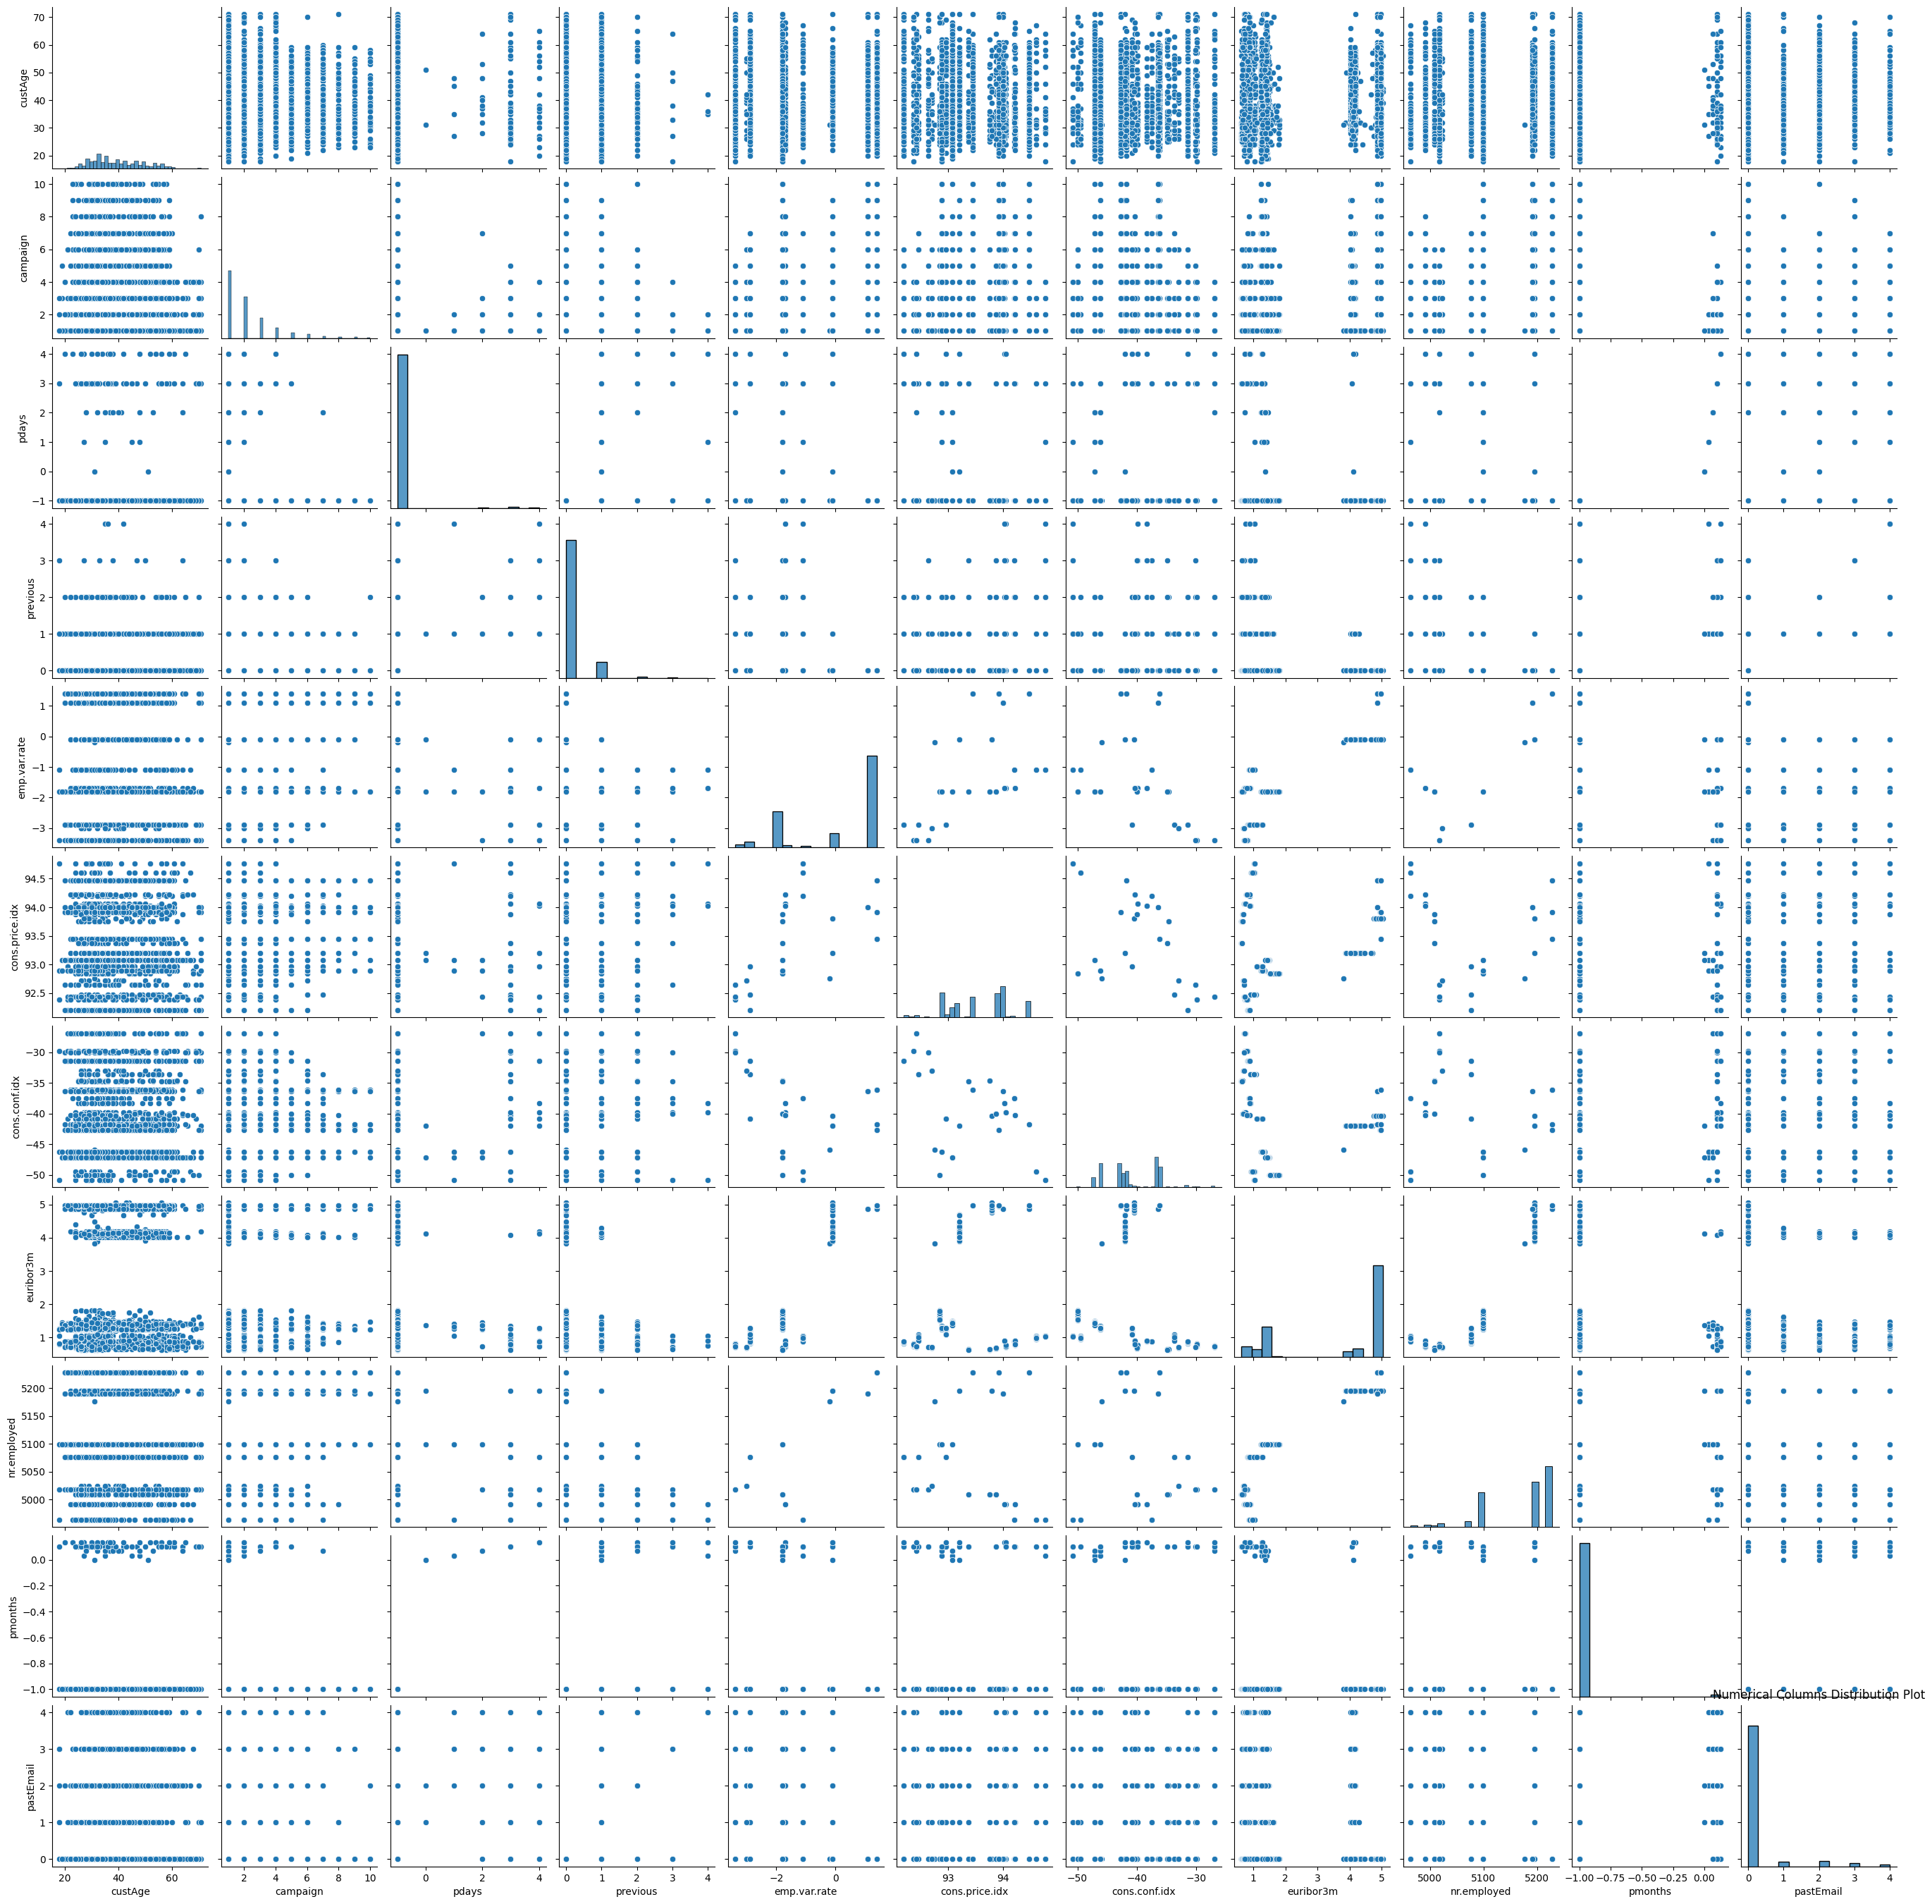

In [ ]:
sns.pairplot(data = cleaned_data)
plt.title('Numerical Columns Distribution Plot')
plt.show()

**Pairplot Displays the distribution between all numerical columns**

### Plot 6: Distribution of numerical columns using Boxplot

In [ ]:
# Create a subplot figure
fig = make_subplots(rows=3, cols=4, subplot_titles=[f'Boxplot of {col}' for col in numerical])

# Define the color for the boxplots
box_color = '#1f77b4'

# Loop through each numerical column and create a boxplot
for i, column in enumerate(numerical, 1):
    row = (i - 1) // 4 + 1
    col = (i - 1) % 4 + 1
    box = px.box(cleaned_data, y=column, template="plotly_dark", color_discrete_sequence=[box_color])
    for trace in box.data:
        fig.add_trace(trace, row=row, col=col)

# Update layout
fig.update_layout(height=800, width=1400, title_text="Numerical Data Boxplots", showlegend=False)

fig.show()

**The boxplot displays the distribution of values with in the upper and lower limits**

### Plot 7: Distribution Using CountPlot

In [ ]:
# Create a subplot figure
fig = make_subplots(rows=6, cols=2, subplot_titles=[f'Distribution of {col}' for col in categorical])


# Loop through each categorical column and create a bar chart
for i, column in enumerate(categorical, 1):
    row = (i - 1) // 2 + 1
    col = (i - 1) % 2 + 1
    hist = px.histogram(cleaned_data, x=column, template="plotly_dark")
    for trace in hist.data:
        fig.add_trace(trace, row=row, col=col)

# Update layout
fig.update_layout(height=1500, width=1300, title_text="Categorical Data Distributions", showlegend=False)

# Update x-axis labels rotation
for i in range(1, 13):
    fig.update_xaxes(row=(i - 1) // 2 + 1, col=(i - 1) % 2 + 1, tickangle=90)

fig.show()

**Above plot displays the distribution count of categories from all categorical columns**

### Plot 8: Distribution of numerical columns using Volin Chart

In [ ]:
# Create a subplot figure
fig = make_subplots(rows=6, cols=2, subplot_titles=[f'Violin Plot of {col}' for col in numerical])

# Define the color for the violin plots
violin_color = 'red'  # Change to your desired color

# Loop through each numerical column and create a violin plot
for i, column in enumerate(numerical, 1):
    row = (i - 1) // 2 + 1
    col = (i - 1) % 2 + 1
    violin = px.violin(cleaned_data, y=column, template="plotly_white", color_discrete_sequence=[violin_color])
    for trace in violin.data:
        fig.add_trace(trace, row=row, col=col)

# Update layout
fig.update_layout(height=1800, width=1400, title_text="Numerical Data Violin Plots", showlegend=False, paper_bgcolor='white', plot_bgcolor='black')

fig.show()

**Voilin Plot displays the density of each value in each numerical columns**

### Plot 9: Distribution on Outcome with responded column

In [ ]:
fig = px.histogram(
    cleaned_data,
    x='poutcome',
    color='responded',
    title='Response Based on Outcome',
    labels={'poutcome': 'Outcome of Marketing', 'count': 'Count of Customers'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Update layout for better visualization
fig.update_layout(
    plot_bgcolor='lightblue',  # Background color
    xaxis_title='Outcome of Marketing',
    yaxis_title='Count of Customers',
    barmode='group'
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=90)

# Show the plot
fig.show()

### Plot 10: Plot for Response Based on Previous Contact Month

In [ ]:
# Create a count plot using Plotly
fig = px.histogram(
    cleaned_data,
    x='pmonths',
    color='responded',
    title='Response Based on Previous Contact Month',
    labels={'pmonths': 'Outcome of Previous Month Contacted', 'count': 'Count of Customers'},
    color_discrete_sequence=px.colors.sequential.Pinkyl
)

# Update layout for better visualization
fig.update_layout(
    plot_bgcolor='black',  # Background color
    xaxis_title='Outcome of Previous Month Contacted',
    yaxis_title='Count of Customers',
    barmode='group'
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=35)

# Show the plot
fig.show()

**Never contacted customers have responded more than contacted customers**

### Plot 11: Response Based on Contact Type

In [ ]:
# Create a count plot using Plotly
fig = px.histogram(
    cleaned_data,
    x='contact',
    color='responded',
    title='Response Based on Contact Type',
    labels={'contact': 'Outcome of Contact Type', 'count': 'Count of Customers'},
    color_discrete_sequence=['red', 'black']  # Pastel colors
)

# Update layout for better visualization
fig.update_layout(
    plot_bgcolor='cyan',  # Background color
    xaxis_title='Outcome of Contact Type',
    yaxis_title='Count of Customers',
    barmode='group'
)

# Show the plot
fig.show()

**Customers contacted via cellular responded more than contacted via email**

### Plot 12: Distribution of employee variance rate on target column

In [ ]:
# Create a histogram using Plotly Express
fig = px.histogram(
    cleaned_data,
    x='emp.var.rate',
    color='responded',
    barmode='group',
    title='Distribution of Employee Variance Rate',
    labels={'emp.var.rate': 'Employee Variance Rate', 'count': 'Count of Customers'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Update layout for better visualization
fig.update_layout(
    plot_bgcolor='lavender',  # Background color
    xaxis_title='Employee Variance Rate',
    yaxis_title='Count of Customers'
)

# Show the plot
fig.show()

**Customers with -1.8 variance rate and 1.4 variance rate responded more**

### Plot 13: Distribution on No. of Employees

In [ ]:
# Create a bar chart using Plotly
fig = px.histogram(
    cleaned_data,
    x='nr.employed',
    color='responded',
    barmode='group',
    title='Distribution on No. of Employees',
    labels={'nr.employed': 'No. of Employees', 'count': 'Count of Customers'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Update layout for better visualization
fig.update_layout(
    plot_bgcolor='lightcyan',  # Background color
    xaxis_title='No. of Employees',
    yaxis_title='Count of Customers',
    xaxis={'categoryorder':'total descending'} # Updating the x-axis category order
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=35)

# Show the plot
fig.show()

**Customers with 5076.2 and 5099.1 and 5228.1 nr.employee rate responded more**

### Plot 14: Response on Contact Count

In [ ]:
# Create a bar chart using Plotly
fig = px.histogram(
    cleaned_data,
    x='campaign',
    color='responded',
    barmode='group',
    title='Distribution of Contacted Count',
    labels={'campaign': 'Contacted Count', 'count': 'Count of Customers'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Update layout for better visualization
fig.update_layout(
    plot_bgcolor='black',  # Background color
    xaxis_title='Contacted Count',
    yaxis_title='Count of Customers'
)

# Show the plot
fig.show()

**Customers contacted once and twice responded more**

### Plot 15: Countplot to find balance of data in target column

In [ ]:
# Create a bar chart using Plotly
fig = px.histogram(
    cleaned_data,
    x='responded',
    title='Balance Fit of Target Column',
    labels={'responded': 'Response', 'count': 'Count of Customers'},
    color='responded',  # Color by the 'responded' variable
    color_discrete_map={'Yes': '#FFD700', 'No': '#808080'}  # Custom colors for 'Yes' and 'No'
)

# Update layout for better visualization
fig.update_layout(
    plot_bgcolor='black',  # Background color
    xaxis_title='Response',
    yaxis_title='Count of Customers'
)

# Show the plot
fig.show()

**The countplot clearly displays that the data is highly imbalanced in the target column**

## Feature Engineering

As the categorical columns are related opted for Label Encoding and for Scaling opted for Standar Scaler

### Encoding the Categorical Columns

In [ ]:
## Define encoder
encoder = LabelEncoder()

In [ ]:
for col in categorical:
    cleaned_data[col] =  encoder.fit_transform(cleaned_data[col])

In [ ]:
cleaned_data

custAge  profession  marital  schooling  default  housing  loan  \
0        34.0           0        2          6        0        0     2   
2        31.0           0        2          3        0        0     0   
3        52.0           0        0          6        1        2     0   
4        39.0           1        2          6        1        2     0   
5        40.0           2        1          6        0        2     0   
...       ...         ...      ...        ...      ...      ...   ...   
8230     28.0           0        1          6        0        0     0   
8231     34.0           0        2          6        0        2     0   
8232     52.0           7        1          3        1        2     0   
8235     32.0           6        2          6        0        0     0   
8236     32.0           3        1          6        0        0     0   

      contact  month  day_of_week  campaign  pdays  previous  poutcome  \
0           0      0            4       2.0   -1.0       0.0         1   
2           1      4            2       1.0   -1.0       0.0         1   
3           0      3            3       2.0   -1.0       0.0         1   
4           0      3            3       6.0   -1.0       0.0         1   
5           1      4            2       3.0   -1.0       0.0         1   
...       ...    ...          ...       ...    ...       ...       ...   
8230        0      0            2       1.0    2.0       2.0         2   
8231        0      1            4       1.0   -1.0       0.0         1   
8232        0      3            0       3.0   -1.0       0.0         1   
8235        0      0            2       1.0   -1.0       0.0         1   
8236        0      4            3       1.0   -1.0       0.0         1   

      emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0             -1.8          93.075          -47.1      1.498       5099.1   
2              1.4          94.465          -41.8      4.961       5228.1   
3              1.4          93.918          -42.7      4.962       5228.1   
4              1.4          93.918          -42.7      4.961       5228.1   
5              1.4          94.465          -41.8      4.866       5228.1   
...            ...             ...            ...        ...          ...   
8230          -1.8          93.075          -47.1      1.365       5099.1   
8231           1.4          93.444          -36.1      4.965       5228.1   
8232           1.4          93.918          -42.7      4.962       5228.1   
8235          -1.8          93.075          -47.1      1.435       5099.1   
8236          -2.9          92.963          -40.8      1.099       5076.2   

       pmonths  pastEmail  responded  
0    -1.000000        0.0          0  
2    -1.000000        0.0          0  
3    -1.000000        0.0          0  
4    -1.000000        0.0          0  
5    -1.000000        0.0          0  
...        ...        ...        ...  
8230  0.066667        0.0          1  
8231 -1.000000        0.0          1  
8232 -1.000000        0.0          1  
8235 -1.000000        0.0          1  
8236 -1.000000        0.0          1  

[7689 rows x 22 columns]

### Scaling the Numerical Columns

In [ ]:
## Define Scaler
sc_x = StandardScaler()

## Perform Scaling using fit_transform
cleaned_data[numerical] = sc_x.fit_transform(cleaned_data[numerical])

## Display data after scaling
cleaned_data

custAge  profession  marital  schooling  default  housing  loan  \
0    -0.571474           0        2          6        0        0     2   
2    -0.881628           0        2          3        0        0     0   
3     1.289453           0        0          6        1        2     0   
4    -0.054550           1        2          6        1        2     0   
5     0.048835           2        1          6        0        2     0   
...        ...         ...      ...        ...      ...      ...   ...   
8230 -1.191783           0        1          6        0        0     0   
8231 -0.571474           0        2          6        0        2     0   
8232  1.289453           7        1          3        1        2     0   
8235 -0.778244           6        2          6        0        0     0   
8236 -0.778244           3        1          6        0        0     0   

      contact  month  day_of_week  campaign     pdays  previous  poutcome  \
0           0      0            4 -0.158712 -0.108228 -0.336683         1   
2           1      4            2 -0.740933 -0.108228 -0.336683         1   
3           0      3            3 -0.158712 -0.108228 -0.336683         1   
4           0      3            3  2.170174 -0.108228 -0.336683         1   
5           1      4            2  0.423509 -0.108228 -0.336683         1   
...       ...    ...          ...       ...       ...       ...       ...   
8230        0      0            2 -0.740933  6.694223  5.023057         2   
8231        0      1            4 -0.740933 -0.108228 -0.336683         1   
8232        0      3            0  0.423509 -0.108228 -0.336683         1   
8235        0      0            2 -0.740933 -0.108228 -0.336683         1   
8236        0      4            3 -0.740933 -0.108228 -0.336683         1   

      emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0        -1.249216       -0.872271      -1.417032  -1.279324    -1.051718   
2         0.833753        1.574891      -0.251449   0.759341     0.852462   
3         0.833753        0.611871      -0.449378   0.759930     0.852462   
4         0.833753        0.611871      -0.449378   0.759341     0.852462   
5         0.833753        1.574891      -0.251449   0.703414     0.852462   
...            ...             ...            ...        ...          ...   
8230     -1.249216       -0.872271      -1.417032  -1.357620    -1.051718   
8231      0.833753       -0.222629       1.002102   0.761696     0.852462   
8232      0.833753        0.611871      -0.449378   0.759930     0.852462   
8235     -1.249216       -0.872271      -1.417032  -1.316412    -1.051718   
8236     -1.965236       -1.069452      -0.031528  -1.514214    -1.389747   

       pmonths  pastEmail  responded  
0    -0.110613  -0.293841          0  
2    -0.110613  -0.293841          0  
3    -0.110613  -0.293841          0  
4    -0.110613  -0.293841          0  
5    -0.110613  -0.293841          0  
...        ...        ...        ...  
8230  8.771967  -0.293841          1  
8231 -0.110613  -0.293841          1  
8232 -0.110613  -0.293841          1  
8235 -0.110613  -0.293841          1  
8236 -0.110613  -0.293841          1  

[7689 rows x 22 columns]

## Train and Test Split

In [ ]:
## Define X and y
X = cleaned_data.drop('responded', axis = True)
y = cleaned_data['responded']


## Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Print Shape of train and test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5382, 21)
(2307, 21)
(5382,)
(2307,)


## Sampling the Training Dataset

- As the dat is highly imbalanced at target column we need to using sampling technique.
- Going forward with **Undersampling the training data and then Oversampling the undersampled data**.

In [ ]:
## Define Under Sampler
under = RandomUnderSampler(sampling_strategy=0.5)

## Define Over Sampler
over = SMOTE(sampling_strategy=0.5)

In [ ]:
# Apply under-sampling to the training data
x_train_, y_train_ = under.fit_resample(X_train, y_train)

# Apply over-sampling to the under-sampled training data
x_train_resampled, y_train_resampled = over.fit_resample(X_train, y_train)

In [ ]:
## Print resampled Data shape
print(x_train_resampled.shape)
print(y_train_resampled.shape)

(7272, 21)
(7272,)


# Model Selection


## Classification Models Considered for Training
```
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- Support Vector Classifier
- K-Nearest Neighbors Classifier (KNN)
- XGBoost Classifier
- Neural Network Classifier
```



# Model Training

### 1. Logistic Regression Classifier

In [ ]:
## Define Model
lgr = LogisticRegression()

# Train Model
lgr.fit(x_train_resampled,y_train_resampled)

LogisticRegression()

In [ ]:
## Predict Test data
lgr_pred = lgr.predict(X_test)

In [ ]:
# Performance Evaluation

# Accuracy Score
lgr_accuracy = accuracy_score(y_test, lgr_pred)
print("-"*50)
print("Logistic Regression Model Accuracy:", lgr_accuracy)

# ROC AUC Score
lgr_roc = roc_auc_score(y_test, lgr_pred)
print("-"*50)
print("Logistic Regression Model ROC AUC Score:", lgr_roc)

### Classification Report
print("-"*50)
print("Logistic Regression Model Classiffication Report: \n\n",classification_report(y_test, lgr_pred))
print("-"*50)



--------------------------------------------------
Logistic Regression Model Accuracy: 0.9107065452969224
--------------------------------------------------
Logistic Regression Model ROC AUC Score: 0.5
--------------------------------------------------
Logistic Regression Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.91      1.00      0.95      2101
           1       0.00      0.00      0.00       206

    accuracy                           0.91      2307
   macro avg       0.46      0.50      0.48      2307
weighted avg       0.83      0.91      0.87      2307

--------------------------------------------------


In [ ]:
# Calculate performance metrics
lgr_accuracy = accuracy_score(y_test, lgr_pred)
lgr_roc = roc_auc_score(y_test, lgr_pred)
lgr_classification_report = classification_report(y_test, lgr_pred, output_dict=True)

# Confusion Matrix
lgr_confusion_matrix = confusion_matrix(y_test, lgr_pred)

# Plotly figure for the confusion matrix heatmap
fig = go.Figure(data=go.Heatmap(
    z=lgr_confusion_matrix,
    x=['Predicted Negative', 'Predicted Positive'],
    y=['Actual Negative', 'Actual Positive'],
    colorscale='Viridis',  # Adjust the colorscale as needed ('Viridis', 'YlGnBu', etc.)
    hoverongaps=False,
    hovertemplate='Actual: %{y}<br>Predicted: %{x}<br>Count: %{z}<extra></extra>'
))

# Update layout
fig.update_layout(
    title='Logistic Regression Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='Actual Label',
    width=600,
    height=400,
)

# Show the interactive plot
fig.show()

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lgr_pred)
roc_auc = auc(fpr, tpr)

# Plotly figure for ROC curve
fig = go.Figure()

# ROC curve trace
fig.add_trace(go.Scatter(
    x=fpr, y=tpr,
    mode='lines',
    name=f'ROC curve (AUC = {roc_auc:.2f})',
    line=dict(color='darkorange', width=2)
))

# Diagonal line (random classifier)
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    name='Random Classifier',
    line=dict(color='navy', width=2, dash='dash')
))

# Layout updates
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    legend=dict(x=0.02, y=0.98),
    margin=dict(l=20, r=20, t=30, b=20)
)

# Show the interactive plot
fig.show()

### 2. Decision Tree Classifier

In [ ]:
## Define Model
dtc = DecisionTreeClassifier()

# Train Model
dtc.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier()

In [ ]:
## Predict Test data
dtc_pred = dtc.predict(X_test)

In [ ]:
# Performance Evaluation

# Accuracy Score
dtc_accuracy = accuracy_score(y_test, dtc_pred)
print("-"*50)
print("Decision Tree Model Accuracy:", dtc_accuracy)

# ROC AUC Score
dtc_roc = roc_auc_score(y_test, dtc_pred)
print("-"*50)
print("Decision Tree Model ROC AUC Score:", dtc_roc)

### Classification Report
print("-"*50)
print("Decision Tree Model Classiffication Report: \n\n",classification_report(y_test, dtc_pred))
print("-"*50)


--------------------------------------------------
Decision Tree Model Accuracy: 0.6697009102730819
--------------------------------------------------
Decision Tree Model ROC AUC Score: 0.5318722476120942
--------------------------------------------------
Decision Tree Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.92      0.70      0.79      2101
           1       0.11      0.36      0.16       206

    accuracy                           0.67      2307
   macro avg       0.51      0.53      0.48      2307
weighted avg       0.85      0.67      0.74      2307

--------------------------------------------------


In [ ]:
# Compute confusion matrix
dtc_confusion_matrix = confusion_matrix(y_test, dtc_pred)

# Plotly figure for the confusion matrix heatmap
fig = go.Figure(data=go.Heatmap(
    z=dtc_confusion_matrix,
    x=['Predicted Negative', 'Predicted Positive'],
    y=['Actual Negative', 'Actual Positive'],
    colorscale='Viridis',  # Adjust the colorscale as needed ('Viridis', 'YlGnBu', etc.)
    hoverongaps=False,
    hovertemplate='Actual: %{y}<br>Predicted: %{x}<br>Count: %{z}<extra></extra>'
))

# Update layout
fig.update_layout(
    title='Decision Tree Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='Actual Label',
    width=600,
    height=400,
)

# Show the interactive plot
fig.show()

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, dtc_pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plotly figure for ROC curve
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=fpr, y=tpr,
    mode='lines',
    name=f'ROC curve (AUC = {roc_auc:.2f})',
    line=dict(color='darkorange', width=2)
))
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    line=dict(color='navy', width=2, dash='dash'),
    showlegend=False
))
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    width=1200,  # Adjust width as needed
    height=500,  # Adjust height as needed
)

# Show the interactive plot
fig.show()

### 3. Random Forest Classifier

In [ ]:
## Define Model
rfc = RandomForestClassifier()

# Train Model
rfc.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier()

In [ ]:
## Predict Test data
rfc_pred = rfc.predict(X_test)

In [ ]:
# Performance Evaluation

# Accuracy Score
rfc_accuracy = accuracy_score(y_test, rfc_pred)
print("-"*50)
print("Random Forest Model Accuracy:", rfc_accuracy)

# ROC AUC Score
rfc_roc = roc_auc_score(y_test, rfc_pred)
print("-"*50)
print("Random Forest Model ROC AUC Score:", rfc_roc)

# Classification Report
print("-"*50)
print("Random Forest Model Classiffication Report: \n\n",classification_report(y_test, rfc_pred))
print("-"*50)


--------------------------------------------------
Random Forest Model Accuracy: 0.6228868660598179
--------------------------------------------------
Random Forest Model ROC AUC Score: 0.5499542520205358
--------------------------------------------------
Random Forest Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.92      0.64      0.76      2101
           1       0.11      0.46      0.18       206

    accuracy                           0.62      2307
   macro avg       0.52      0.55      0.47      2307
weighted avg       0.85      0.62      0.70      2307

--------------------------------------------------


In [ ]:
# Calculate confusion matrix
rfc_confusion_matrix = confusion_matrix(y_test, rfc_pred)

# Plotly figure for confusion matrix heatmap
fig = go.Figure(data=go.Heatmap(
    z=rfc_confusion_matrix,
    x=['Predicted Negative', 'Predicted Positive'],
    y=['Actual Negative', 'Actual Positive'],
    colorscale='Viridis',  # Adjust the colorscale as needed
    hoverongaps=False,
    hovertemplate='Actual: %{y}<br>Predicted: %{x}<br>Count: %{z}<extra></extra>'
))

# Update layout
fig.update_layout(
    title='Random Forest Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='Actual Label',
    width=600,  # Adjust width as needed
    height=400,  # Adjust height as needed
)

# Show the interactive plot
fig.show()

In [ ]:
# Calculate fpr, tpr, thresholds and AUC
fpr, tpr, thresholds = roc_curve(y_test, rfc_pred)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr,
                         mode='lines',
                         name='ROC curve (area = {:.2f})'.format(roc_auc)))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                         mode='lines',
                         line=dict(dash='dash'),
                         name='Random Guessing'))
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    width=1200,  # Adjust width as needed
    height=500,  # Adjust height as needed
)
fig.show()


### 4. Gradient Boosting Classifier

In [ ]:
# Define Model
gbc = GradientBoostingClassifier()

# Train Model
gbc.fit(x_train_resampled,y_train_resampled)

GradientBoostingClassifier()

In [ ]:
# Predict Test data
gbc_pred = gbc.predict(X_test)

In [ ]:
# Performance Evaluation

# Accuracy Score
gbc_accuracy = accuracy_score(y_test, gbc_pred)
print("-"*50)
print("Gradient Boosting Model Accuracy:", gbc_accuracy)

# ROC AUC Score
gbc_roc = roc_auc_score(y_test, gbc_pred)
print("-"*50)
print("Gradient Boosting Model ROC AUC Score:", gbc_roc)

# Classification Report
print("-"*50)
print("Gradient Boosting Model Classiffication Report: \n\n",classification_report(y_test, gbc_pred))
print("-"*50)

--------------------------------------------------
Gradient Boosting Model Accuracy: 0.25964456003467706
--------------------------------------------------
Gradient Boosting Model ROC AUC Score: 0.530040017929511
--------------------------------------------------
Gradient Boosting Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.94      0.20      0.33      2101
           1       0.10      0.86      0.17       206

    accuracy                           0.26      2307
   macro avg       0.52      0.53      0.25      2307
weighted avg       0.86      0.26      0.32      2307

--------------------------------------------------


In [ ]:
# Calculate ROC curve and AUC
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test, gbc_pred)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)

# Plot ROC curve using Plotly
fig_roc = go.Figure()
fig_roc.add_trace(go.Scatter(x=fpr_gbc, y=tpr_gbc,
                             mode='lines',
                             name='ROC curve (area = {:.2f})'.format(roc_auc_gbc)))
fig_roc.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                             mode='lines',
                             line=dict(dash='dash'),
                             name='Random Guessing'))
fig_roc.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve - Gradient Boosting Classifier',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    width=1200,
    height=600,
)
fig_roc.show()

In [ ]:
# Calculate confusion matrix
gbc_confusion_matrix = confusion_matrix(y_test, gbc_pred)

# Create a Plotly figure for the confusion matrix heatmap
fig = go.Figure(data=go.Heatmap(
    z=gbc_confusion_matrix,
    x=['Predicted Negative', 'Predicted Positive'],
    y=['Actual Negative', 'Actual Positive'],
    colorscale='Viridis',  # Adjust the colorscale as needed ('Blues', 'Greens', 'Reds', etc.)
    hoverongaps=False,
    hovertemplate='Actual: %{y}<br>Predicted: %{x}<br>Count: %{z}<extra></extra>'
))

# Update layout
fig.update_layout(
    title='Gradient Boosting Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='Actual Label',
    width=600,
    height=400,
)

# Show the interactive plot
fig.show()

### 5. Support Vector Machines

In [ ]:
# Define Model
svc = SVC()

# Train Model
svc.fit(x_train_resampled,y_train_resampled)

SVC()

In [ ]:
## Predict Test data
svc_pred = svc.predict(X_test)

In [ ]:
# Performance Evaluation

# Accuracy Score
svc_accuracy = accuracy_score(y_test, svc_pred)
print("-"*50)
print("Support Vector Model Accuracy:", svc_accuracy)

# ROC AUC Score
svc_roc = roc_auc_score(y_test, svc_pred)
print("-"*50)
print("Support Vector Model ROC AUC Score:", svc_roc)

# Classification Report
print("-"*50)
print("Support Vector Model Classiffication Report: \n\n",classification_report(y_test, svc_pred))
print("-"*50)


--------------------------------------------------
Support Vector Model Accuracy: 0.9107065452969224
--------------------------------------------------
Support Vector Model ROC AUC Score: 0.5
--------------------------------------------------
Support Vector Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.91      1.00      0.95      2101
           1       0.00      0.00      0.00       206

    accuracy                           0.91      2307
   macro avg       0.46      0.50      0.48      2307
weighted avg       0.83      0.91      0.87      2307

--------------------------------------------------


In [ ]:
# Calculate confusion matrix
svc_confusion_matrix = confusion_matrix(y_test, svc_pred)

# Create a Plotly figure for the confusion matrix heatmap
fig = go.Figure(data=go.Heatmap(
    z=svc_confusion_matrix,
    x=['Predicted Negative', 'Predicted Positive'],
    y=['Actual Negative', 'Actual Positive'],
    colorscale='YlGnBu',
    hoverongaps=False,
    hovertemplate='Actual: %{y}<br>Predicted: %{x}<br>Count: %{z}<extra></extra>'
))

# Update layout
fig.update_layout(
    title='Support Vector Classifier Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='Actual Label',
    width=600,
    height=400,
)

# Show the interactive plot
fig.show()

In [ ]:
# Calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, svc_pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Create Plotly figure for ROC curve
fig = go.Figure()

# Add ROC curve
fig.add_trace(go.Scatter(x=fpr, y=tpr,
                         mode='lines',
                         name='ROC curve (AUC = {:.2f})'.format(roc_auc),
                         line=dict(color='darkorange', width=2)))

# Add diagonal line
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                         mode='lines',
                         line=dict(color='navy', width=2, dash='dash'),
                         showlegend=False))

# Update layout
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    width=1200,
    height=600,
    legend=dict(x=0.02, y=0.98, bgcolor='rgba(255, 255, 255, 0.5)'),
    margin=dict(l=0, r=0, t=30, b=0),
    hovermode='closest'
)

# Show plot
fig.show()

### 6. K Nearest Neighbors

In [ ]:
# Define Model
knn = KNeighborsClassifier()

# Train Model
knn.fit(x_train_resampled,y_train_resampled)

KNeighborsClassifier()

In [ ]:
# Predict Test data
knn_pred = knn.predict(X_test)

In [ ]:
# Performance Evaluation

# Accuracy Score
knn_accuracy = accuracy_score(y_test, knn_pred)
print("-"*50)
print("K-Nearest Neighbours Model Accuracy:", knn_accuracy)

# ROC AUC Score
knn_roc = roc_auc_score(y_test, knn_pred)
print("-"*50)
print("K-Nearest Neighbours Model ROC AUC Score:", knn_roc)

# Classification Report
print("-"*50)
print("K-Nearest Neighbours Model Classiffication Report: \n\n",classification_report(y_test, knn_pred))
print("-"*50)


--------------------------------------------------
K-Nearest Neighbours Model Accuracy: 0.5964456003467707
--------------------------------------------------
K-Nearest Neighbours Model ROC AUC Score: 0.45881526596211697
--------------------------------------------------
K-Nearest Neighbours Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.90      0.63      0.74      2101
           1       0.07      0.29      0.11       206

    accuracy                           0.60      2307
   macro avg       0.49      0.46      0.43      2307
weighted avg       0.83      0.60      0.68      2307

--------------------------------------------------


In [ ]:
# Confusion Matrix
knn_confusion_matrix = confusion_matrix(y_test, knn_pred)

# Create a Plotly figure for the confusion matrix heatmap
fig = go.Figure(data=go.Heatmap(
    z=knn_confusion_matrix,
    x=['Predicted Negative', 'Predicted Positive'],
    y=['Actual Negative', 'Actual Positive'],
    colorscale='Viridis',
    hoverongaps=False,
    hovertemplate='Actual: %{y}<br>Predicted: %{x}<br>Count: %{z}<extra></extra>',
    text=knn_confusion_matrix
))

# Update layout
fig.update_layout(
    title='K-Nearest Neighbours Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='Actual Label',
    width=600,
    height=400,
)

# Show the interactive plot
fig.show()

In [ ]:
# Define fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, knn_pred)

# Define AUC
roc_auc = auc(fpr, tpr)

# Create a Plotly figure for the ROC curve
fig = go.Figure()

# Add the ROC curve
fig.add_trace(go.Scatter(
    x=fpr, y=tpr,
    mode='lines',
    name='ROC curve (area = {:.2f})'.format(roc_auc),
    line=dict(color='darkorange', width=2)
))

# Add the diagonal line
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    name='Diagonal line',
    line=dict(color='navy', width=2, dash='dash')
))

# Update layout
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    width=1200,
    height=600,
    legend=dict(
        x=0.8,
        y=0.2,
        bgcolor='rgba(255, 255, 255, 0)',
    )
)

# Show the interactive plot
fig.show()

### 7. XG Boosting

In [ ]:
# Define Model
xgc  = XGBClassifier()

# Train Model
xgc.fit(x_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predict Test data
xgc_pred = xgc.predict(X_test)

In [ ]:
# Performance Evaluation

# Accuracy Score
xgc_accuracy = accuracy_score(y_test, xgc_pred)
print("-"*50)
print("XG Boosting Model Accuracy:", xgc_accuracy)

# ROC AUC Score
xgc_roc = roc_auc_score(y_test, xgc_pred)
print("-"*50)
print("XG Boosting Model ROC AUC Score:", xgc_roc)

# Classification Report
print("-"*50)
print("XG Boosting Model Classiffication Report: \n\n",classification_report(y_test, xgc_pred))
print("-"*50)


--------------------------------------------------
XG Boosting Model Accuracy: 0.20026007802340703
--------------------------------------------------
XG Boosting Model ROC AUC Score: 0.5346529391921554
--------------------------------------------------
XG Boosting Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.96      0.13      0.23      2101
           1       0.10      0.94      0.17       206

    accuracy                           0.20      2307
   macro avg       0.53      0.53      0.20      2307
weighted avg       0.88      0.20      0.22      2307

--------------------------------------------------


In [ ]:
# Define the confusion matrix
xgc_confusion_matrix = confusion_matrix(y_test, xgc_pred)

# Create a Plotly figure for the confusion matrix heatmap
fig = go.Figure(data=go.Heatmap(
    z=xgc_confusion_matrix,
    x=['Predicted Negative', 'Predicted Positive'],
    y=['Actual Negative', 'Actual Positive'],
    colorscale='Viridis',  # You can choose different colorscales such as 'Viridis', 'Blues', etc.
    hoverongaps=False,
    hovertemplate='Actual: %{y}<br>Predicted: %{x}<br>Count: %{z}<extra></extra>'
))

# Update layout
fig.update_layout(
    title='XG Boosting Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='Actual Label',
    width=600,
    height=400,
)

# Show the interactive plot
fig.show()


In [ ]:
# Define fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgc_pred)

# Define AUC
roc_auc = auc(fpr, tpr)

# Create a Plotly figure for the ROC curve
fig = go.Figure()

# Add the ROC curve
fig.add_trace(go.Scatter(
    x=fpr, y=tpr,
    mode='lines',
    line=dict(color='darkorange', width=2),
    name=f'ROC curve (area = {roc_auc:.2f})'
))

# Add the diagonal line
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    line=dict(color='navy', width=2, dash='dash'),
    showlegend=False
))

# Update layout
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    width=1200,
    height=600
)

# Show the interactive plot
fig.show()

### 8. Neural Networks

In [ ]:
# Define Model
nnc = MLPClassifier()

# Train Model
nnc.fit(x_train_resampled,y_train_resampled)

MLPClassifier()

In [ ]:
# Predict Test data
nnc_pred = nnc.predict(X_test)

In [ ]:
# Performance Evaluation

# Accuracy Score
nnc_accuracy = accuracy_score(y_test, nnc_pred)
print("-"*50)
print("Neural Network Model Accuracy:", nnc_accuracy)

# ROC AUC Score
nnc_roc = roc_auc_score(y_test, nnc_pred)
print("-"*50)
print("Neural Network Model ROC AUC Score:", nnc_roc)

# Classification Report
print("-"*50)
print("Neural Network Model Classiffication Report: \n\n",classification_report(y_test, nnc_pred))
print("-"*50)


--------------------------------------------------
Neural Network Model Accuracy: 0.9107065452969224
--------------------------------------------------
Neural Network Model ROC AUC Score: 0.5
--------------------------------------------------
Neural Network Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.91      1.00      0.95      2101
           1       0.00      0.00      0.00       206

    accuracy                           0.91      2307
   macro avg       0.46      0.50      0.48      2307
weighted avg       0.83      0.91      0.87      2307

--------------------------------------------------


In [ ]:
# Define confusion matrix
nnc_confusion_matrix = confusion_matrix(y_test, nnc_pred)

# Create a Plotly figure for the confusion matrix heatmap
fig = go.Figure(data=go.Heatmap(
    z=nnc_confusion_matrix,
    x=['Predicted Negative', 'Predicted Positive'],
    y=['Actual Negative', 'Actual Positive'],
    colorscale='Viridis',  # Mimicking 'Pastel2'
    hoverongaps=False,
    showscale=False,
    hovertemplate='Actual: %{y}<br>Predicted: %{x}<br>Count: %{z}<extra></extra>'
))

# Update layout
fig.update_layout(
    title='Neural Network Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='Actual Label',
    width=600,
    height=400
)

# Show the interactive plot
fig.show()


In [ ]:
# Define fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, nnc_pred)

# Define AUC
roc_auc = auc(fpr, tpr)

# Create a Plotly figure for the ROC curve
fig = go.Figure()

# Add ROC curve
fig.add_trace(go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    line=dict(color='darkorange', width=2),
    name=f'ROC curve (area = {roc_auc:.2f})'
))

# Add diagonal line
fig.add_trace(go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    line=dict(color='navy', width=2, dash='dash'),
    showlegend=False
))

# Update layout
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    xaxis=dict(range=[0.0, 1.0]),
    yaxis=dict(range=[0.0, 1.05]),
    width=1200,
    height=600,
    legend=dict(x=0.8, y=0.2)
)

# Show the interactive plot
fig.show()


### Compare Models and Find best Model

In [ ]:
## List of tuples containing (model, accuracy)
model_accuracy_list = [('Logistic Regression', lgr_accuracy, lgr_roc), ("Decision Tree Classifier", dtc_accuracy, dtc_roc),
                       ("Random Forest Classifier", rfc_accuracy, rfc_roc),
                       ("Gradient Boosting Classifier", gbc_accuracy, gbc_roc),
                      ('Support Vector Machines', svc_accuracy, svc_roc),
                       ('KNeighbours Classifiers', knn_accuracy, knn_roc),
                         ('XG Boosting', xgc_accuracy, xgc_roc), ('Neural Network', nnc_accuracy, nnc_roc)]
model_accuracy_list

[('Logistic Regression', 0.9107065452969224, 0.5),
 ('Decision Tree Classifier', 0.6697009102730819, 0.5318722476120942),
 ('Random Forest Classifier', 0.6228868660598179, 0.5499542520205358),
 ('Gradient Boosting Classifier', 0.25964456003467706, 0.530040017929511),
 ('Support Vector Machines', 0.9107065452969224, 0.5),
 ('KNeighbours Classifiers', 0.5964456003467707, 0.45881526596211697),
 ('XG Boosting', 0.20026007802340703, 0.5346529391921554),
 ('Neural Network', 0.9107065452969224, 0.5)]

In [ ]:
## Threshold for minimum accuracy
min_accuracy_threshold = 0.75

best_model = None
best_accuracy = 0.0

## Find the best model with the highest accuracy
for model, accuracy, roc_score in model_accuracy_list:
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_roc = roc_score

## Best Model Display
if best_model is not None:
    print("Best Model:", best_model)
    print('-'*50)
    print("Validation Accuracy of the Best Model:", best_accuracy)
    print('-'*50)
    print('ROC AUC Score of the Best Model:', best_roc)
else:
    print("No model met the accuracy threshold.")

Best Model: Logistic Regression
--------------------------------------------------
Validation Accuracy of the Best Model: 0.9107065452969224
--------------------------------------------------
ROC AUC Score of the Best Model: 0.5


## Hyperparameter Tuning

From the list of models, **"XG Boosting Model"** has the highest accuracy (0.9059) among all models. This model would be a good candidate for hyperparameter tuning and cross-validation to further improve its performance.

### Tuning : RandomSearchCV

In [ ]:
# Create a XGBoostingClassifier
Xg_classifier = XGBClassifier()

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_weight': randint(1, 10),
}

In [ ]:

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    Xg_classifier,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    scoring='accuracy',  # Use an appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)


# Fit the model to the data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c2aa1e4eb00>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c2a92656080>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c2a92276710>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c2a92657d30>},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
# Get the best parameters and best estimator
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_estimator = random_search.best_estimator_
print('Best Model :' , best_estimator)

Best Hyperparameters: {'colsample_bytree': 0.662397808134481, 'learning_rate': 0.027425083650459835, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 153, 'subsample': 0.8832290311184181}
Best Model : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.662397808134481, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.027425083650459835,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=153, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make predictions on the test set
y_pred = best_estimator.predict(X_test)

# Evaluate the best model

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Best Model :", accuracy)
print('-'*50)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score of Best Model:", roc_auc)
print('-'*50)

# CLassification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print('-'*50)


Accuracy of Best Model : 0.9150411790203727
--------------------------------------------------
ROC AUC Score of Best Model: 0.5680558957130908
--------------------------------------------------

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      2101
           1       0.60      0.15      0.23       206

    accuracy                           0.92      2307
   macro avg       0.76      0.57      0.59      2307
weighted avg       0.89      0.92      0.89      2307

--------------------------------------------------


In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])

# Plot the confusion matrix heatmap
fig = px.imshow(conf_matrix_df,
                text_auto=True,
                color_continuous_scale='Viridis',  # Use a compatible colormap
                labels={'color': 'Count'},
                x=['Predicted Negative', 'Predicted Positive'],
                y=['Actual Negative', 'Actual Positive'])

fig.update_layout(
    title='Best Model Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='Actual Label',
    coloraxis_showscale=False
)

fig.show()


**There is an increase in accuracy of model performance with original training data**

## Cross Validation

In [ ]:
# Create a KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_val_score(best_estimator, X_train, y_train, cv=kf, scoring='accuracy')

# Print the results
print("Cross-Validation Results:", cv_results)
print("Average Accuracy:", cv_results.mean())

Cross-Validation Results: [0.90064995 0.90343547 0.9070632  0.90892193 0.89962825]
Average Accuracy: 0.9039397610738904


# Hyperparameter tuning and cross-validation results:
The best estimator achieved an accuracy of approximately 91.3%, which is consistent with the cross-validation accuracy of 90.3%. This suggests that the chosen hyperparameters provide a stable and reliable model with minimal variance across different folds.

### Feature Importance

In [ ]:
feature_importances = best_estimator.feature_importances_

In [ ]:
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance = feature_importance_df.sort_values(by='Importance', ascending=True)

In [ ]:
# Display feature importances
print(feature_importance)

           Feature  Importance
5          housing    0.014080
6             loan    0.014153
2          marital    0.017527
10        campaign    0.017866
3        schooling    0.018754
1       profession    0.018972
9      day_of_week    0.021806
8            month    0.022445
20       pastEmail    0.023014
0          custAge    0.023354
4          default    0.025808
12        previous    0.026188
15  cons.price.idx    0.026232
7          contact    0.035058
13        poutcome    0.037432
17       euribor3m    0.041762
19         pmonths    0.055552
11           pdays    0.058703
16   cons.conf.idx    0.062735
14    emp.var.rate    0.096658
18     nr.employed    0.341900


In [ ]:
fig = px.bar(feature_importance,
             x='Importance',
             y='Feature',
             orientation='h',
             title='Feature Importance in Random Forest')

fig.update_layout(
    xaxis_title='Importance',
    yaxis_title='Feature'
)

fig.show()

**Feature importances indicate the contribution of each feature to the model's predictions.A higher importance value suggests a stronger influence on the model's decision-making.**
- Features with the highest importance:
 - 'nr.employed' (30%) and 'emp.var.rate' (12%) significantly impact the model,
   indicating that economic factors play a crucial role in predicting the outcome.

## -----------------------------------------------------------------------------------------------------------------------------

## Predictions On Unseen Data

### Reading the Test Data

In [ ]:
## Read test.csv
test = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dataset/Propensify/test.xlsx')

## Shape pd test.csv
test.shape

In [ ]:
test.head(15)

In [ ]:
# Dropping Unwanted row

test.drop('id', axis =1, inplace = True)

### Handling Null values in Test Data

In [ ]:
# Sum of Null values
test.isnull().sum()

In [ ]:
# Impute using Backward fill as 1st row is null
test['custAge'].fillna(method='bfill', inplace=True)
test['schooling'].fillna(method = 'bfill', inplace=True)
test['day_of_week'].fillna(method = 'bfill', inplace=True)

### Replacing Values 999 with -1 as never contacted

In [ ]:
# Replacing values
test['pdays'] =test['pdays'].replace(999, -1)
test['pmonths']=test['pmonths'].replace(999, -1)

### Seperating Categorical And Numerical Columns

In [ ]:
catcol = [col for col in test.columns if test[col].dtype == 'object']
numcol = [col for col in test.columns if test[col].dtype != 'object']

catcol, numcol


### Encoding Categorical Columns Of Unseen Data

In [ ]:
for col in catcol:
    test[col] = encoder.fit_transform(test[col])

In [ ]:
# scaling
test[numcol] = sc_x.fit_transform(test[numcol])

In [ ]:
test

### Making Predictions on Unseen Data Using Best Model

In [ ]:
# Make predictions on the test set
test_pred = best_estimator.predict(test)

#### Creating Column in Test Data as Marketing Desicion using predictions

In [ ]:
# Adding Decision Column
test['MarketingDecision'] = test_pred

## Value Counts
test['MarketingDecision'].value_counts()

In [ ]:
test.head()

# -----------------------------------------------------------------------------------------------------------

## Getting exact list of Customers That can be Contacted for Marketing

In [ ]:
# Read again
candidate = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dataset/Propensify/test.xlsx')

candidate.shape

(32950, 22)

In [ ]:
candidate.head()

custAge   profession   marital            schooling  default housing loan  \
0      NaN       admin.   married                  NaN       no      no  yes   
1     35.0     services   married          high.school       no      no   no   
2     50.0  blue-collar   married  professional.course  unknown     yes   no   
3     30.0       admin.    single    university.degree       no      no   no   
4     39.0     services  divorced          high.school       no     yes   no   

    contact month day_of_week  campaign  pdays  previous     poutcome  \
0  cellular   sep         wed         2    999         1      failure   
1  cellular   sep         tue         2      3         1      success   
2  cellular   may         thu         1    999         1      failure   
3  cellular   aug         wed         1    999         0  nonexistent   
4  cellular   nov         tue         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0          -1.1          94.199          -37.5      0.886       4963.6   
1          -3.4          92.379          -29.8      0.788       5017.5   
2          -1.8          92.893          -46.2      1.327       5099.1   
3           1.4          93.444          -36.1      4.964       5228.1   
4          -0.1          93.200          -42.0      4.153       5195.8   

   pmonths  pastEmail  id  
0    999.0          2   1  
1      0.1          2   2  
2    999.0          2   3  
3    999.0          0   4  
4    999.0          0   5

In [ ]:
# Adding Decision Column to original Test data
candidate['MarketingDecision'] = test_pred

# GEtting customers count for marketing decision 1
candidate[candidate['MarketingDecision']==1].shape

(934, 23)

In [ ]:
# Creating new dataframe with potential customers list
customers_list = candidate[candidate['MarketingDecision']==1]

In [ ]:
# Exporting to Excel file
customers_list.to_excel('testingCandidate_with_1.xlsx', index=False)

In [ ]:
# List of Potential Customers
customers_list

custAge    profession   marital          schooling  default housing  \
1         35.0      services   married        high.school       no      no   
32         NaN        admin.    single        high.school       no     yes   
35        19.0       student    single            unknown       no     yes   
147       70.0       retired   married                NaN       no     yes   
158       60.0        admin.   married                NaN  unknown     yes   
...        ...           ...       ...                ...      ...     ...   
32742     76.0       retired   married                NaN       no     yes   
32751     74.0       retired  divorced           basic.4y       no     yes   
32834     34.0        admin.    single                NaN       no     yes   
32924     52.0    management   married        high.school       no     yes   
32933      NaN  entrepreneur   married  university.degree       no      no   

      loan   contact month day_of_week  campaign  pdays  previous  \
1       no  cellular   sep         tue         2      3         1   
32      no  cellular   apr         wed         1    999         0   
35     yes  cellular   apr         fri         4    999         0   
147     no  cellular   may         thu         1      3         2   
158     no  cellular   dec         wed         1    999         0   
...    ...       ...   ...         ...       ...    ...       ...   
32742   no  cellular   sep         wed         2      3         1   
32751  yes  cellular   jul         wed         2    999         0   
32834   no  cellular   may         wed         1     11         1   
32924  yes  cellular   aug         tue         1     10         4   
32933   no  cellular   sep         NaN         1      3         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
1          success          -3.4          92.379          -29.8      0.788   
32     nonexistent          -1.8          93.075          -47.1      1.405   
35     nonexistent          -1.8          93.075          -47.1      1.405   
147        success          -1.8          93.876          -40.0      0.683   
158    nonexistent          -3.0          92.713          -33.0      0.721   
...            ...           ...             ...            ...        ...   
32742      success          -3.4          92.379          -29.8      0.781   
32751  nonexistent          -1.7          94.215          -40.3      0.896   
32834      success          -1.8          92.893          -46.2      1.334   
32924      failure          -2.9          92.201          -31.4      0.883   
32933      success          -1.1          94.199          -37.5      0.882   

       nr.employed     pmonths  pastEmail     id  MarketingDecision  
1           5017.5    0.100000          2      2                  1  
32          5099.1  999.000000          0     33                  1  
35          5099.1  999.000000          0     36                  1  
147         5008.7    0.100000          0    148                  1  
158         5023.5  999.000000          0    159                  1  
...            ...         ...        ...    ...                ...  
32742       5017.5    0.100000          0  32743                  1  
32751       4991.6  999.000000          0  32752                  1  
32834       5099.1    0.366667          2  32835                  1  
32924       5076.2    0.333333          4  32925                  1  
32933       4963.6    0.100000          2  32934                  1  

[934 rows x 23 columns]

### Above is the list of potential customers.
## This potential customer list, combined with strategic insights, positions us for a targeted and impactful marketing campaign that aligns with the preferences and behaviors of our customers.


### Recap of My Work

1. **Data Exploration and Visualization:**
   - Explored various aspects of the data including customer demographics, contact methods, and previous campaign outcomes.
   - Visualized distributions and relationships using different plots like histograms, count plots, box plots, and ROC curves.

2. **Data Preprocessing:**
   - Handled categorical variables through label encoding.
   - Scaled numerical features using StandardScaler.
   - Dealt with imbalanced data using RandomUnderSampler and SMOTE techniques for sampling.

3. **Model Training:**
   - Trained several classification models including Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier, Support Vector Machines, K Nearest Neighbors, XG Boosting, and Neural Networks.
   - Evaluated models based on accuracy, ROC AUC score, classification reports, and confusion matrices.

4. **Model Selection and Evaluation:**
   - Identified XG Boosting as the best-performing model based on validation accuracy (90.72%) and ROC AUC score (59.66%).
   - Used RandomSearchCV for hyperparameter tuning of the XG Boosting model to further enhance performance.

5. **Hyperparameter Tuning:**
   - Tuned hyperparameters such as `n_estimators`, `max_depth`, `learning_rate`, `subsample`, `colsample_bytree`, and `min_child_weight` using RandomizedSearchCV.
   - Identified the best hyperparameters for the XG Boosting model.

### Recommendations and Next Steps

- **Feature Importance:** After tuning, it would be beneficial to analyze feature importances provided by the XG Boosting model. This can help in understanding which features contribute the most to predicting customer response.
  
- **Cross-Validation:** Implement cross-validation techniques such as k-fold cross-validation to ensure the model's robustness and generalize better to unseen data.

- **Deployment:** Once satisfied with the model performance, consider deploying it in a production environment where it can be used to predict responses to new marketing campaigns.

- **Monitoring:** Continuously monitor model performance and retrain periodically to adapt to changing trends and customer behaviors.

By following these steps, you'll be able to build a reliable propensity model that can effectively optimize the insurance company's marketing efforts. Great job on the detailed analysis and model building process!

## Model Deployment Plan


### 1. Creating the Flask API

```python
from flask import Flask, request, jsonify
import joblib
import pandas as pd
import os

app = Flask(__name__)

# Load the model and encoders
folder_path = 'model_folder'
model = joblib.load(os.path.join(folder_path, 'lightgbm_model.pkl'))
labelEncoders = joblib.load(os.path.join(folder_path, 'labelEncoders.pkl'))
target_encoder = joblib.load(os.path.join(folder_path, 'target_encoder.pkl'))
sc_multiclass = joblib.load(os.path.join(folder_path, 'sc_multiclass.pkl'))
sc_numerical = joblib.load(os.path.join(folder_path, 'sc_numerical.pkl'))
numerical = joblib.load(os.path.join(folder_path, 'numerical.pkl'))
multiclass_cols = joblib.load(os.path.join(folder_path, 'multiclass_cols.pkl'))
binary_cols_from_cat_cols = joblib.load(os.path.join(folder_path, 'binary_cols_from_cat_cols.pkl'))
binary = joblib.load(os.path.join(folder_path, 'binary.pkl'))
selector = joblib.load(os.path.join(folder_path, 'selector.pkl'))
dependent = joblib.load(os.path.join(folder_path, 'dependent.pkl'))

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    df = pd.DataFrame(data)
    
    # Apply the same preprocessing as during training
    for col in binary:
        df[col] = df[col].apply(lambda x: 1 if x in ['yes', 'True', True, '1', 1] else 0)
        
    for col in multiclass_cols:
        df[col] = labelEncoders[col].transform(df[col].astype(str))
    
    df[numerical] = sc_numerical.transform(df[numerical])
    df[multiclass_cols] = sc_multiclass.transform(df[multiclass_cols])
    df = df[selector]
    
    predictions = model.predict(df)
    return jsonify(predictions.tolist())

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000)
```

### 2. Dockerizing the Application

#### Dockerfile

```dockerfile
# Use an official Python runtime as a parent image
FROM python:3.8-slim

# Set the working directory in the container
WORKDIR /app

# Copy the current directory contents into the container at /app
COPY . .

# Install any needed packages specified in requirements.txt
RUN pip install --no-cache-dir -r requirements.txt

# Make port 5000 available to the world outside this container
EXPOSE 5000

# Run app.py when the container launches
CMD ["python", "app.py"]
```

#### requirements.txt

```plaintext
Flask==2.0.1
pandas==1.3.3
joblib==1.1.0
lightgbm==3.3.1
```

### 3. Building and Running the Docker Container

Build the Docker image:

```bash
docker build -t lightgbm-api .
```

Run the Docker container:

```bash
docker run -p 5000:5000 lightgbm-api
```

### 4. Testing the API

You can test the API using curl or any API testing tool like Postman.

Example curl command:

```bash
curl -X POST http://localhost:5000/predict -H "Content-Type: application/json" -d '[{"feature1": value1, "feature2": value2, ...}]'
```

Replace `feature1`, `feature2`, etc., with the actual feature names and values from your dataset.

This setup ensures that your model and all required preprocessing steps are saved and deployed in a consistent manner. The Flask API will handle incoming requests, preprocess the data, and return predictions. The Docker container makes it easy to deploy the application in any environment.

